In [9]:
import pandas as pd
import numpy as np
import collections
import re

In [10]:
doc1 = 'Game of Thrones is an amazing tv series!'
doc2 = 'Game of Thrones is the best tv series!'
doc3 = 'Game of Thrones is so great'

In [11]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()
l_doc2 = re.sub(r"[^a-zA-Z0-9]", " ", doc2.lower()).split()
l_doc3 = re.sub(r"[^a-zA-Z0-9]", " ", doc3.lower()).split()

In [12]:
l = l_doc1
l.extend(l_doc2)
l.extend(l_doc3)
l

['game',
 'of',
 'thrones',
 'is',
 'an',
 'amazing',
 'tv',
 'series',
 'game',
 'of',
 'thrones',
 'is',
 'the',
 'best',
 'tv',
 'series',
 'game',
 'of',
 'thrones',
 'is',
 'so',
 'great']

In [13]:
wordset=set(l)

In [14]:
wordset

{'amazing',
 'an',
 'best',
 'game',
 'great',
 'is',
 'of',
 'series',
 'so',
 'the',
 'thrones',
 'tv'}

In [6]:
l_doc1

['game', 'of', 'thrones', 'is', 'an', 'amazing', 'tv', 'series']

In [15]:
def calculateBOW(wordset,l_doc):
    tf_diz = dict.fromkeys(wordset,0)
    for word in l_doc:
        tf_diz[word]=l_doc.count(word)
    return tf_diz

In [16]:
bow1 = calculateBOW(wordset,l_doc1)
bow2 = calculateBOW(wordset,l_doc2)
bow3 = calculateBOW(wordset,l_doc3)
df_bow = pd.DataFrame([bow1,bow2,bow3])
df_bow.head()

,the,so,great,amazing,best,an,of,series,tv,game,is,thrones
0,1,1,1,1,1,1,3,2,2,3,3,3
1,1,0,0,0,1,0,1,1,1,1,1,1
2,0,1,1,0,0,0,1,0,0,1,1,1


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [23]:
X = vectorizer.fit_transform([doc1,doc2,doc3])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,amazing,an,best,game,great,is,of,series,so,the,thrones,tv
0,1,1,0,1,0,1,1,1,0,0,1,1
1,0,0,1,1,0,1,1,1,0,1,1,1
2,0,0,0,1,1,1,1,0,1,0,1,0


In [24]:
print(vectorizer.get_feature_names_out())

['amazing' 'an' 'best' 'game' 'great' 'is' 'of' 'series' 'so' 'the'
 'thrones' 'tv']


In [27]:
# Python3 code for preprocessing text 
import nltk 
nltk.download('punkt')
import re 
import numpy as np 

# execute the text here as : 
text = """ 'Game of Thrones is an amazing tv series!'
'Game of Thrones is the best tv series!'
'Game of Thrones is so great'
 
 """ 
dataset = nltk.sent_tokenize(text) 
for i in range(len(dataset)): 
	dataset[i] = dataset[i].lower() 
	dataset[i] = re.sub(r'\W', ' ', dataset[i]) 
	dataset[i] = re.sub(r'\s+', ' ', dataset[i]) 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JOYCE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [28]:
print(dataset)

[' game of thrones is an amazing tv series ', ' game of thrones is the best tv series ', ' game of thrones is so great ']


In [29]:
# Creating the Bag of Words model 
word2count = {} 
for data in dataset: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

In [30]:
word2count

{'game': 3,
 'of': 3,
 'thrones': 3,
 'is': 3,
 'an': 1,
 'amazing': 1,
 'tv': 2,
 'series': 2,
 'the': 1,
 'best': 1,
 'so': 1,
 'great': 1}

In [31]:
words

['game', 'of', 'thrones', 'is', 'so', 'great']

In [32]:
len(words)

6

In [33]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [34]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [35]:
word_to_ix

{'the': 0,
 'so': 1,
 'great': 2,
 'amazing': 3,
 'best': 4,
 'an': 5,
 'of': 6,
 'series': 7,
 'tv': 8,
 'game': 9,
 'is': 10,
 'thrones': 11}

In [36]:
ix_to_word

{0: 'the',
 1: 'so',
 2: 'great',
 3: 'amazing',
 4: 'best',
 5: 'an',
 6: 'of',
 7: 'series',
 8: 'tv',
 9: 'game',
 10: 'is',
 11: 'thrones'}

In [37]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['game', 'of', 'is', 'so'], 'thrones'), (['of', 'thrones', 'so', 'great'], 'is')]


In [38]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [39]:
embeddings

array([[0.71903924, 0.72482244, 0.01171397, 0.27372177, 0.83809528,
        0.83990067, 0.57771062, 0.04555815, 0.77082474, 0.66942896],
       [0.83937223, 0.45335869, 0.48808404, 0.14534755, 0.41532881,
        0.078775  , 0.89861751, 0.49719623, 0.23759965, 0.47042106],
       [0.04826775, 0.22632192, 0.42684433, 0.68712054, 0.54822186,
        0.06407352, 0.36257156, 0.31069897, 0.79281326, 0.42420039],
       [0.05480781, 0.46432819, 0.85304149, 0.31689858, 0.84211568,
        0.76193283, 0.14879105, 0.28017965, 0.05827367, 0.62747548],
       [0.14876203, 0.8698643 , 0.5072883 , 0.1840728 , 0.84303021,
        0.90827732, 0.54618519, 0.38576892, 0.94120674, 0.75721071],
       [0.82093567, 0.21190834, 0.78738052, 0.13485141, 0.21628517,
        0.07488491, 0.08920558, 0.35552133, 0.41155316, 0.69035628],
       [0.19886852, 0.15599375, 0.59379838, 0.87663148, 0.67726472,
        0.23555791, 0.62691494, 0.21869411, 0.33519399, 0.40353301],
       [0.38046958, 0.64069087, 0.7783674

In [40]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [41]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [42]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

In [43]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [44]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [45]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [46]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [47]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [48]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

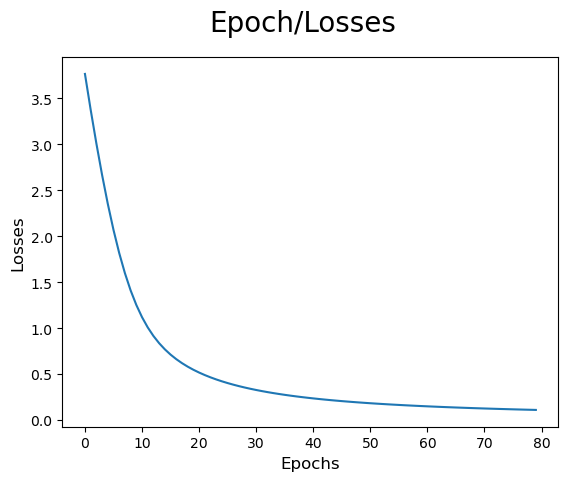

In [49]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [53]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

1.0

In [55]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word
predict(['the', 'game', 'best', 'of'])

'is'